In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import boxcox

In [220]:
# heart_2022_df = pd.read_csv("heart_2022_no_nans.csv")
heart_2022_df = pd.read_csv("heart_2022_no_nans.csv")
heart_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [221]:
heart_2022_df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [222]:
heart_2022_df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [223]:
heart_2022_df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [224]:
for col in heart_2022_df.columns:
    if len(heart_2022_df[col].unique()) < 5:
        print(f"{col} : {heart_2022_df[col].unique()}")

Sex : ['Female' 'Male']
LastCheckupTime : ['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)']
PhysicalActivities : ['Yes' 'No']
RemovedTeeth : ['None of them' '6 or more, but not all' '1 to 5' 'All']
HadHeartAttack : ['No' 'Yes']
HadAngina : ['No' 'Yes']
HadStroke : ['No' 'Yes']
HadAsthma : ['No' 'Yes']
HadSkinCancer : ['No' 'Yes']
HadCOPD : ['No' 'Yes']
HadDepressiveDisorder : ['No' 'Yes']
HadKidneyDisease : ['No' 'Yes']
HadArthritis : ['Yes' 'No']
HadDiabetes : ['No' 'Yes' 'Yes, but only during pregnancy (female)'
 'No, pre-diabetes or borderline diabetes']
DeafOrHardOfHearing : ['No' 'Yes']
BlindOrVisionDifficulty : ['No' 'Yes']
DifficultyConcentrating : ['No' 'Yes']
DifficultyWalking : ['No' 'Yes']
DifficultyDressingBathing : ['No' 'Yes']
DifficultyErrands : ['No' 'Yes']
SmokerStatus : ['Former smoker' 'Never smoked' 'Current smoker - now sm

In [225]:
for col in heart_2022_df.columns:
    if len(heart_2022_df[col].unique()) >= 5 and len(heart_2022_df[col].unique()) < 15:
        print(f"{col} : {heart_2022_df[col].unique()}")

GeneralHealth : ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
RaceEthnicityCategory : ['White only, Non-Hispanic' 'Black only, Non-Hispanic'
 'Other race only, Non-Hispanic' 'Multiracial, Non-Hispanic' 'Hispanic']
AgeCategory : ['Age 65 to 69' 'Age 70 to 74' 'Age 75 to 79' 'Age 80 or older'
 'Age 50 to 54' 'Age 40 to 44' 'Age 60 to 64' 'Age 55 to 59'
 'Age 45 to 49' 'Age 35 to 39' 'Age 25 to 29' 'Age 30 to 34'
 'Age 18 to 24']


In [226]:
for col in heart_2022_df.columns:
    if len(heart_2022_df[col].unique()) >= 15:
        print(f"{col} : {heart_2022_df[col].unique()[:5]} ...")

State : ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'] ...
PhysicalHealthDays : [4. 0. 5. 3. 2.] ...
MentalHealthDays : [ 0. 15.  4. 25.  5.] ...
SleepHours : [9. 6. 8. 5. 7.] ...
HeightInMeters : [1.6  1.78 1.85 1.7  1.55] ...
WeightInKilograms : [ 71.67  95.25 108.86  90.72  79.38] ...
BMI : [27.99 30.13 31.66 31.32 33.07] ...


In [227]:
yes_no_cols = ['PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke',
               'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
               'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing',
               'BlindOrVisionDifficulty', 'DifficultyConcentrating',
               'DifficultyWalking', 'DifficultyDressingBathing',
               'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers',
               'HIVTesting','FluVaxLast12', 'PneumoVaxEver','HighRiskLastYear']

In [228]:
heart_2022_df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [229]:
heart_2022_df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [237]:
def create_encoders():
    yes_no_encoder = OrdinalEncoder(categories=[["No", "Yes"]],
                                    handle_unknown='use_encoded_value',
                                    unknown_value=-1)
    sex_encoder = OrdinalEncoder(categories=[["Male", "Female"]],
                                handle_unknown='use_encoded_value',
                                unknown_value=2)
    age_encoder = OrdinalEncoder(categories=[['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 
                                             'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49',
                                             'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 
                                             'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 
                                             'Age 80 or older']],
                                handle_unknown='use_encoded_value',
                                unknown_value=-1)
    race_encoder = LabelEncoder()
    diabetic_encoder = OrdinalEncoder(categories=[['No', 'No, pre-diabetes or borderline diabetes',
                                                  'Yes, but only during pregnancy (female)', 'Yes']],
                                    handle_unknown="use_encoded_value",
                                    unknown_value=-1)
    genhealth_encoder = OrdinalEncoder(categories=[["Poor", "Fair", "Good", "Very good", "Excellent"]],
                                    handle_unknown='use_encoded_value',
                                    unknown_value=-1)
    covid_encoder = OrdinalEncoder(categories=[["No","Yes", 'Tested positive using home test without a health professional']],
                                   handle_unknown='use_encoded_value',
                                   unknown_value=-1)
    last_checkup_encoder = OrdinalEncoder(categories=[['Within past year (anytime less than 12 months ago)',
                                              'Within past 2 years (1 year but less than 2 years ago)',
                                              'Within past 5 years (2 years but less than 5 years ago)',
                                              '5 or more years ago']], 
                                          handle_unknown='use_encoded_value',
                                          unknown_value=-1)
    removed_teeth_encoder = OrdinalEncoder(categories= [['None of them', '1 to 5', '6 or more, but not all', 'All']] ,
                                          handle_unknown='use_encoded_value',
                                          unknown_value=-1)
    smoker_encoder = OrdinalEncoder(categories= [['Never smoked', 'Former smoker',
                                                 'Current smoker - now smokes some days', 
                                                 'Current smoker - now smokes every day']],
                                    handle_unknown='use_encoded_value',
                                    unknown_value=-1)
    ecigarette_encoder = OrdinalEncoder(categories=  [['Never used e-cigarettes in my entire life',
                                                      'Not at all (right now)',
                                                      'Use them some days',
                                                      'Use them every day']],
                                        handle_unknown='use_encoded_value',
                                        unknown_value=-1)
    tetanus_encoder = OrdinalEncoder(categories=[['No, did not receive any tetanus shot in the past 10 years',
                                                 'Yes, received tetanus shot but not sure what type',
                                                 'Yes, received tetanus shot, but not Tdap', 'Yes, received Tdap']],
                                     handle_unknown='use_encoded_value',
                                     unknown_value=-1)
    state_encoder = LabelEncoder()

    return {
        "yes_no_encoder" : yes_no_encoder,
        "sex_encoder" : sex_encoder,
        "age_encoder" : age_encoder,
        "race_encoder" : race_encoder,
        "diabetic_encoder" : diabetic_encoder,
        "genhealth_encoder" : genhealth_encoder,
        "covid_encoder" : covid_encoder,
        "last_checkup_encoder" : last_checkup_encoder,
        "removed_teeth_encoder" : removed_teeth_encoder,
        "smoker_encoder" : smoker_encoder,
        "ecigarette_encoder" : ecigarette_encoder,
        "tetanus_encoder" : tetanus_encoder,
        "state_encoder" : state_encoder,
    }


In [ ]:
def fit_encoders(encoder_dict, X_train):
    ###                                           Ordinal Encoders
    for col in yes_no_cols:
       encoder_dict['yes_no_encoder'].fit(X_train[col].values.reshape(-1,1))

    encoder_dict["sex_encoder"].fit(X_train["Sex"].values.reshape(-1,1))
    encoder_dict["age_encoder"].fit(X_train["AgeCategory"].values.reshape(-1,1))
    encoder_dict['diabetic_encoder'].fit(X_train["HadDiabetes"].values.reshape(-1,1))
    encoder_dict['genhealth_encoder'].fit(X_train["GeneralHealth"].values.reshape(-1,1))
    encoder_dict['covid_encoder'].fit(X_train["CovidPos"].values.reshape(-1,1))
    encoder_dict['last_checkup_encoder'].fit(X_train["LastCheckupTime"].values.reshape(-1,1))
    encoder_dict['removed_teeth_encoder'].fit(X_train["RemovedTeeth"].values.reshape(-1,1))
    encoder_dict['smoker_encoder'].fit(X_train['SmokerStatus'].values.reshape(-1,1))
    encoder_dict['ecigarette_encoder'].fit(X_train['ECigaretteUsage'].values.reshape(-1,1))
    encoder_dict['tetanus_encoder'].fit(X_train['TetanusLast10Tdap'].values.reshape(-1,1))

    ###                                           Label Encoders
    encoder_dict['race_encoder'].fit(X_train["RaceEthnicityCategory"])
    encoder_dict['state_encoder'].fit(X_train['State'])
    return encoder_dict

In [ ]:
def create_scalers(X_train):
    height_scaler = StandardScaler().fit(X_train["HeightInMeters"].values.reshape(-1,1))
    weight_scaler = MinMaxScaler().fit(X_train["WeightInKilograms"].values.reshape(-1,1))
    sleep_scaler = StandardScaler().fit(X_train["SleepHours"].values.reshape(-1,1))
    bmi_log_scaler = StandardScaler().fit(np.log1p(X_train["BMI"]).values.reshape(-1,1))
    # phys_health_inv_scaler = 
    scaler_dict = {
        "height_scaler" : height_scaler,
        "weight_scaler" : weight_scaler,
        "sleep_scaler" : sleep_scaler,
        "bmi_log_scaler" : bmi_log_scaler,
        
    }
    return scaler_dict

In [245]:
print("BMI Skewness:", heart_2022_df["BMI"].skew())
print("BMI log Skewness: ", np.log1p(heart_2022_df["BMI"]).skew())

print("HeightInMeters Skewness:", heart_2022_df["HeightInMeters"].skew())
print("WeightInKilograms Skewness:", heart_2022_df["WeightInKilograms"].skew())

print("PhysicalHealthDays Skewness:", heart_2022_df["PhysicalHealthDays"].skew())
print("PhysicalHealthDaysInverted Skewness:", (heart_2022_df["PhysicalHealthDays"].max() - heart_2022_df["PhysicalHealthDays"]).skew())
print("MentalHealthDays Skewness:", heart_2022_df["MentalHealthDays"].skew())
print("SleepHours Skewness:", heart_2022_df["SleepHours"].skew())

BMI Skewness: 1.3264962228330477
BMI log Skewness:  0.4513961010655125
HeightInMeters Skewness: 0.03168057921685034
WeightInKilograms Skewness: 1.0249895359028258
PhysicalHealthDays Skewness: 2.284304560749942
PhysicalHealthDaysInverted Skewness: -2.284304560749942
MentalHealthDays Skewness: 2.2152688509279845
SleepHours Skewness: 0.5614366823727431


In [240]:
def X_preprocess(data, encoder_dict, scaler_dict):
    yes_encoded = []
    ###                                           Ordinal Encoders
    for col in yes_no_cols:
        yes_encoded.append(encoder_dict['yes_no_encoder'].transform(data[col].values.reshape(-1,1)))
    sex_encoded = encoder_dict["sex_encoder"].transform(data["Sex"].values.reshape(-1,1))
    age_encoded = encoder_dict["age_encoder"].transform(data["AgeCategory"].values.reshape(-1,1))
    diabetic_encoded = encoder_dict['diabetic_encoder'].transform(data["HadDiabetes"].values.reshape(-1,1))
    genhealth_encoded = encoder_dict['genhealth_encoder'].transform(data["GeneralHealth"].values.reshape(-1,1))
    covid_encoded = encoder_dict['covid_encoder'].transform(data["CovidPos"].values.reshape(-1,1))
    checkup_encoded = encoder_dict['last_checkup_encoder'].transform(data["LastCheckupTime"].values.reshape(-1,1))
    teeth_encoded = encoder_dict['removed_teeth_encoder'].transform(data["RemovedTeeth"].values.reshape(-1,1))
    smoker_encoded = encoder_dict['smoker_encoder'].transform(data['SmokerStatus'].values.reshape(-1,1))
    ecig_encoded = encoder_dict['ecigarette_encoder'].transform(data['ECigaretteUsage'].values.reshape(-1,1))
    tetanus_encoded = encoder_dict['tetanus_encoder'].transform(data['TetanusLast10Tdap'].values.reshape(-1,1))

    ###                                           Label Encoders
    race_encoded = encoder_dict['race_encoder'].transform(data["RaceEthnicityCategory"])
    state_encoded = encoder_dict['state_encoder'].transform(data['State'])
    yes_no_df = pd.DataFrame(np.column_stack(yes_encoded), columns=yes_no_cols)

    ###                                           Scalers
    height_scaled = scaler_dict["height_scaler"].transform(data["HeightInMeters"].values.reshape(-1,1))
    weight_scaled = scaler_dict["weight_scaler"].transform(data["WeightInKilograms"].values.reshape(-1,1))
    sleep_scaled = scaler_dict["sleep_scaler"].transform(data["SleepHours"].values.reshape(-1,1))
    bmi_log_scaled = scaler_dict["bmi_log_scaler"].transform(np.log1p(data["BMI"]).values.reshape(-1,1))

    encoded_df = pd.DataFrame({
    "State": state_encoded.flatten(),
    "HeightInMeters" : height_scaled.flatten(),
    "WeightInKilograms" : weight_scaled.flatten(),
    "SleepHours" : sleep_scaled.flatten(),
    "BMI" : bmi_log_scaled.flatten(),    
    "Sex" : sex_encoded.flatten(),
    "AgeCategory": age_encoded.flatten(),
    "RaceEthnicityCategory": race_encoded.flatten(),
    "HadDiabetes": diabetic_encoded.flatten(),
    "GeneralHealth": genhealth_encoded.flatten(),
    "CovidPos": covid_encoded.flatten(),
    "LastCheckupTime": checkup_encoded.flatten(),
    "RemovedTeeth": teeth_encoded.flatten(),
    "SmokerStatus": smoker_encoded.flatten(),
    "ECigaretteUsage": ecig_encoded.flatten(),
    "TetanusLast10Tdap": tetanus_encoded.flatten(),
})
    return pd.concat([encoded_df, yes_no_df], axis=1)


In [241]:
target = "HadHeartAttack"
yes_no_cols.remove(target)
X = heart_2022_df.copy().drop(columns=target)
y = heart_2022_df[target].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

ValueError: list.remove(x): x not in list

In [242]:
encoder_dict = fit_encoders(create_encoders(), X_train)
scaler_dict = create_scalers(X_train)

transformed_df = X_preprocess(X_train, encoder_dict=encoder_dict, scaler_dict=scaler_dict)
transformed_df.head()

,State,HeightInMeters,WeightInKilograms,SleepHours,BMI,Sex,AgeCategory,RaceEthnicityCategory,HadDiabetes,GeneralHealth,...,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear
0,41,-0.045627,0.141555,1.371445,-1.076895,1.0,10.0,4,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,46,-0.514495,0.165464,-0.013727,-0.387258,0.0,5.0,4,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,15,-0.045627,0.113997,-0.706313,-1.594070,0.0,7.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,33,-0.983364,0.147066,0.678859,-0.405401,1.0,5.0,1,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,50,-0.983364,0.275734,1.371445,1.445766,1.0,9.0,4,3.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [243]:
set(heart_2022_df.columns) - set(transformed_df)

{'HadHeartAttack', 'MentalHealthDays', 'PhysicalHealthDays'}

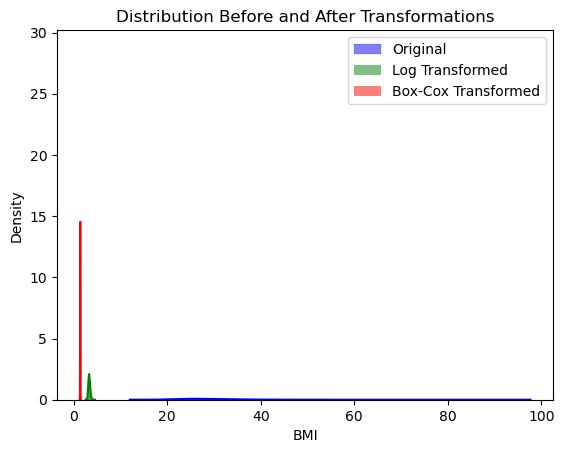

In [ ]:
# Original data
graph_df = heart_2022_df.copy()
sns.histplot(graph_df["BMI"], kde=True, color="blue", label="Original", stat="density")

# Log-transformed data
graph_df["BMI_log"] = np.log1p(graph_df["BMI"])  # log(1 + BMI)
sns.histplot(graph_df["BMI_log"], kde=True, color="green", label="Log Transformed", stat="density")

# Box-Cox-transformed data
graph_df["BMI_boxcox"], fitted_lambda = boxcox(heart_2022_df["BMI"])
sns.histplot(graph_df["BMI_boxcox"], kde=True, color="red", label="Box-Cox Transformed", stat="density")

plt.legend()
plt.title("Distribution Before and After Transformations")
plt.show()
